# RAIN FORECASTING

## Objective
To develop a machine learning model for accurately forecasting monthly rainfall in Mumbai, India. This model will help optimize water allocation, storage, and distribution strategies, enabling efficient reservoir management and cost minimization while ensuring a consistent water supply throughout the year.

## Data Set Overview
The dataset contains monthly rainfall data for Mumbai from 1901 to 2021 (121 years). There are 121 rows and 14 columns(Year + 12 months + Total rain fall). 

ROWS: 

121 Each Row represent a year

COLUMNS:

Year: The year of observation

Jan to Dec: Monthly rainfall (in mm)

Total: Annual total rainfall

## Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Step 2: Load Dataset

In [8]:
# LOAD THE DATASET
df=pd.read_csv("C:/Users/LENOVO/rainfall/mumbai-monthly-rains.csv")

## Step 3: Data Preprocessing

In [10]:
# Display basic information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    121 non-null    int64  
 1   Jan     121 non-null    float64
 2   Feb     121 non-null    float64
 3   Mar     121 non-null    float64
 4   April   121 non-null    float64
 5   May     121 non-null    float64
 6   June    121 non-null    float64
 7   July    121 non-null    float64
 8   Aug     121 non-null    float64
 9   Sept    121 non-null    float64
 10  Oct     121 non-null    float64
 11  Nov     121 non-null    float64
 12  Dec     121 non-null    float64
 13  Total   121 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 13.4 KB


In [11]:
# Display the first five rows
df.head()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
0,1901,13.116602,0.000000,0.000000,3.949669,17.139791,640.714036,888.369692,545.045796,64.271513,9.871696,0.000000,0.000000,2182.478796
1,1902,0.000000,0.000000,0.000000,0.000000,0.355001,247.998782,408.433730,566.595863,688.913455,28.654092,0.488864,19.526547,1960.966334
2,1903,0.000000,0.000000,0.844034,0.000000,220.568740,370.849048,902.447896,602.420828,264.589816,157.892877,0.000000,0.000000,2519.613240
3,1904,0.000000,0.000000,11.381769,0.000000,0.000000,723.081969,390.886799,191.581927,85.704754,38.679948,0.000000,0.000000,1441.317168
4,1905,0.662561,1.713452,0.000000,0.000000,0.000000,123.870892,581.827975,167.382149,172.297723,7.365924,24.903575,0.000000,1080.024250


In [12]:
# checking the shape of the Data
df.shape

(121, 14)

In [13]:
# Checking the decriptive statistics of Dataset
df.describe()

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Total
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,1961.000000,1.567235,0.929358,0.869231,1.428458,18.183632,517.854402,757.407412,465.600818,312.885747,73.983526,13.849462,3.556428,2168.115709
std,35.073732,6.462247,3.077050,2.890032,7.371307,48.628812,251.067016,285.836188,249.072915,205.135368,96.686113,29.689941,12.342390,533.263926
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.058662,103.209194,87.493370,36.313545,0.000000,0.000000,0.000000,1058.840525
25%,1931.000000,0.000000,0.000000,0.000000,0.000000,0.000000,324.094617,540.745923,268.002392,149.584208,9.871696,0.000000,0.000000,1834.996957
50%,1961.000000,0.000000,0.000000,0.000000,0.000000,0.355001,482.449872,788.403637,445.870342,269.276549,43.479170,1.066086,0.000000,2126.054987
75%,1991.000000,0.000000,0.152298,0.000000,0.194165,4.208322,678.040770,942.616099,604.372615,398.645218,98.235161,9.373154,0.176149,2478.558089
max,2021.000000,51.348290,21.107118,18.252996,75.541818,234.392757,1219.518576,1358.833554,1200.956558,987.796660,552.902707,164.348387,90.044602,3563.259531


In [14]:
# Checking the Missing values in the dataset
df.isnull().sum()

Year     0
Jan      0
Feb      0
Mar      0
April    0
May      0
June     0
July     0
Aug      0
Sept     0
Oct      0
Nov      0
Dec      0
Total    0
dtype: int64

There is no missing values in the dataset.

## Exploratory Data Analysis (EDA)

There is no missing value in the dataset so the data types look good.We have to forecast the monthly rainfall so we are going to analyis the datas given.

### Visualize Total Rainfall Trend Over Years

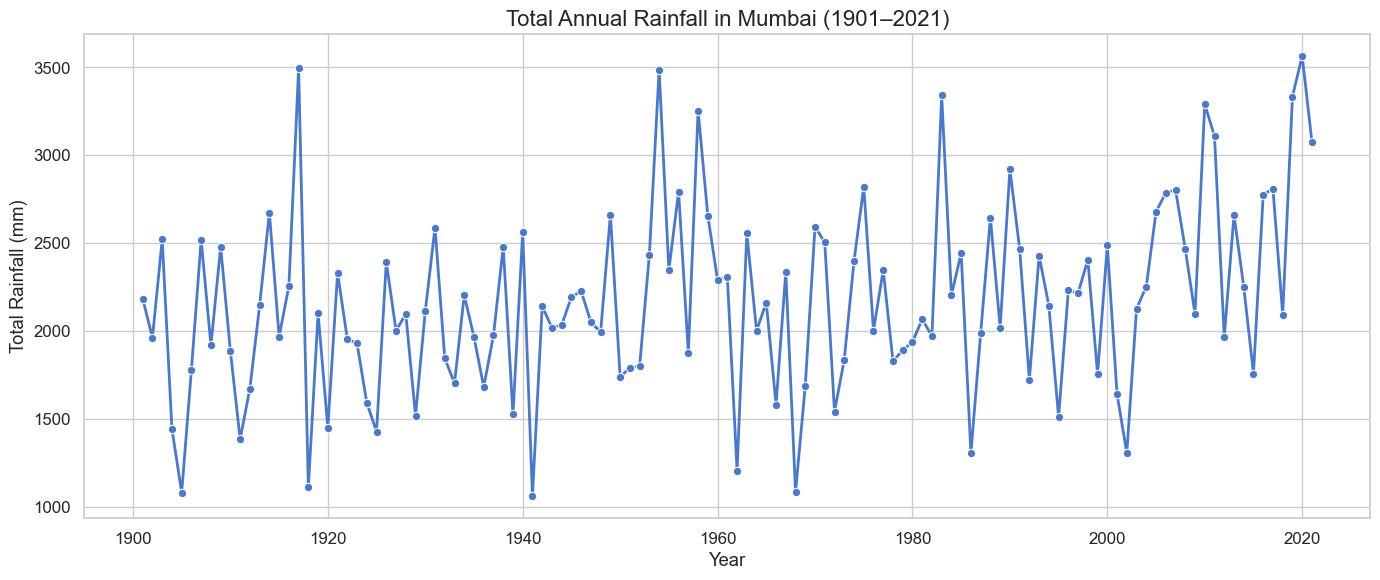

In [26]:
# Set style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Plot total annual rainfall over the years
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='Year', y='Total', marker='o', linewidth=2)
plt.title("Total Annual Rainfall in Mumbai (1901–2021)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Total Rainfall (mm)")
plt.tight_layout()
plt.show()

Here's the visualization of total annual rainfall in Mumbai from 1901 to 2021.

There’s a lot of variability in annual rainfall.

Some years saw extremely high rainfall, while others were significantly lower.

No clear long-term increasing or decreasing trend, but some decadal fluctuations are visible.

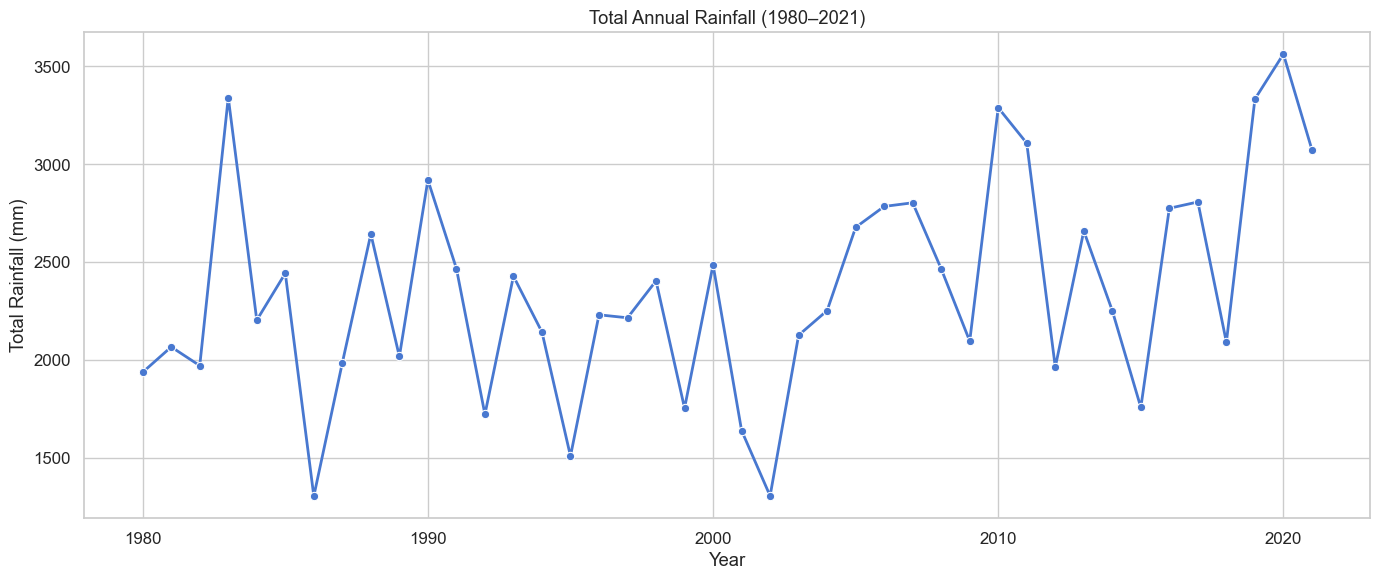

In [29]:
## Recent decades: Rainfall from 1980 onwards
recent_df = df[df["Year"] >= 1980]
plt.figure(figsize=(14, 6))
sns.lineplot(data=recent_df, x='Year', y='Total', marker='o',linewidth=2)
plt.title("Total Annual Rainfall (1980–2021)")
plt.xlabel("Year")
plt.ylabel("Total Rainfall (mm)")
plt.tight_layout()
plt.show()

Some spikes in rainfall are noticeable (e.g., 2005, 2010s).

There’s no consistent upward or downward trend—just high variability.

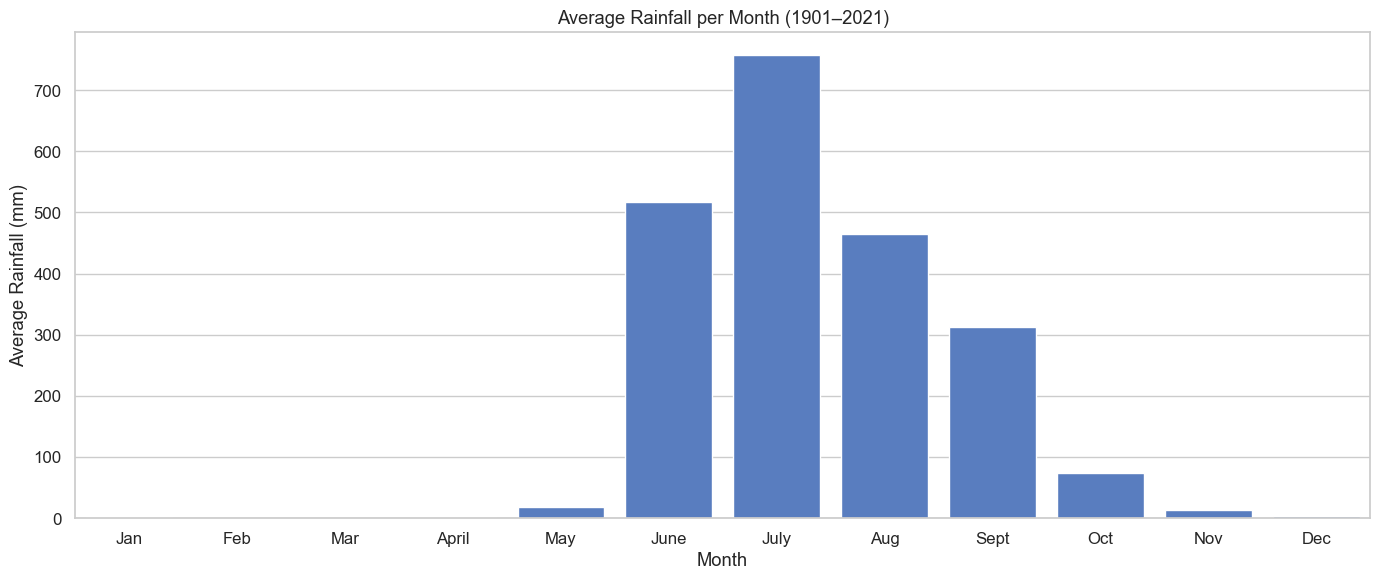

In [32]:
## Monthly average rainfall
monthly_means = df.drop(columns=["Year", "Total"]).mean()
plt.figure(figsize=(14, 6))
sns.barplot(x=monthly_means.index, y=monthly_means.values)
plt.title("Average Rainfall per Month (1901–2021)")
plt.ylabel("Average Rainfall (mm)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

Most rainfall occurs between June and September (monsoon months).

July sees the highest average rainfall by far.

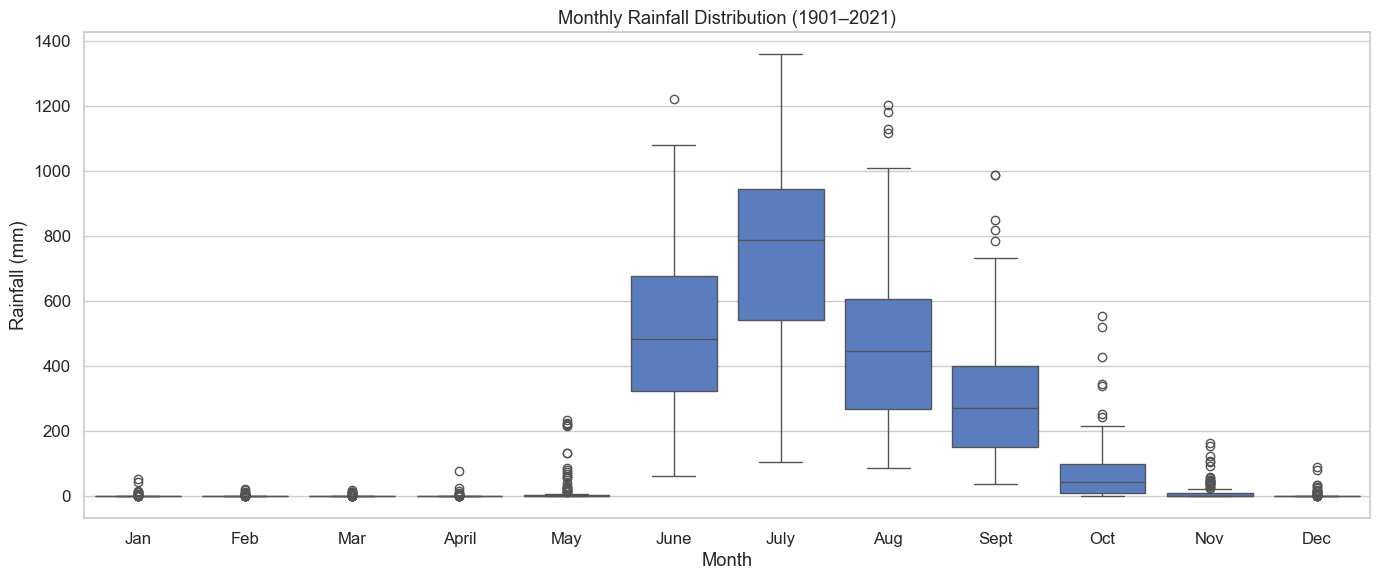

In [35]:
## Boxplot to show seasonality
monthly_df = df.drop(columns=["Total"]).melt(id_vars=["Year"], var_name="Month", value_name="Rainfall")
plt.figure(figsize=(14, 6))
sns.boxplot(data=monthly_df, x='Month', y='Rainfall')
plt.title("Monthly Rainfall Distribution (1901–2021)")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.tight_layout()
plt.show()

Monsoon months show wide variation (especially July and August).

Winter and early summer months are mostly dry (low variation).


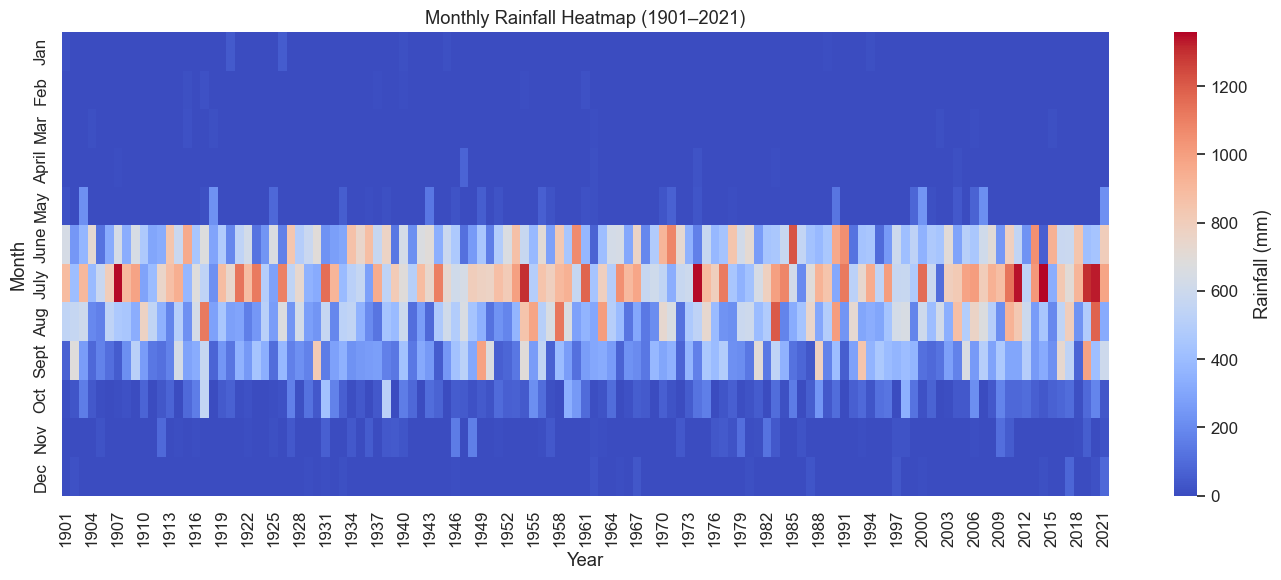

In [38]:
## Heatmap of monthly rainfall over years
monthly_matrix = df.set_index("Year").drop(columns="Total")
plt.figure(figsize=(14, 6))
sns.heatmap(monthly_matrix.T, cmap="coolwarm", cbar_kws={'label': 'Rainfall (mm)'})
plt.title("Monthly Rainfall Heatmap (1901–2021)")
plt.xlabel("Year")
plt.ylabel("Month")
plt.tight_layout()
plt.show()

Monsoon months show wide variation (especially July and August).

Winter and early summer months are mostly dry (low variation).

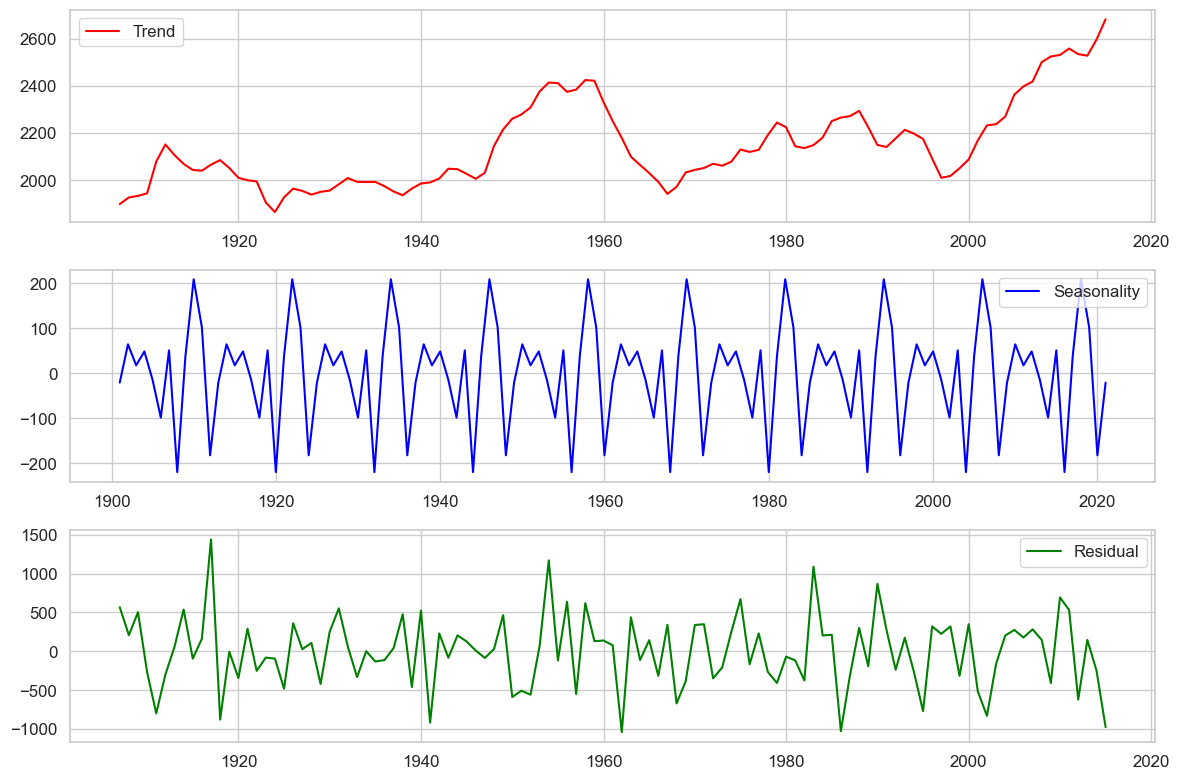

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df["Total"], model="additive", period=12)

# Plot decomposition results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df["Year"], decomposition.trend, label="Trend", color="red")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(df["Year"], decomposition.seasonal, label="Seasonality", color="blue")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(df["Year"], decomposition.resid, label="Residual", color="green")
plt.legend()

plt.tight_layout()
plt.show()


Trend & Seasonality: The decomposition clearly shows a strong seasonal pattern typical of monsoon patterns in Mumbai and some long-term trends over the years.

since we have a long and clean record of monthly rainfall the best models to predict monthly rainfall is Time Series models.

## Feature Engineering

In [46]:
# First, let's prepare the data for time series modeling
# We'll create a long-form DataFrame with datetime and rainfall values

# Reshape the data: convert wide format (months as columns) to long format
df_long = df.melt(id_vars=["Year"], 
                  value_vars=["Jan", "Feb", "Mar", "April", "May", "June", 
                              "July", "Aug", "Sept", "Oct", "Nov", "Dec"],
                  var_name="Month", value_name="Rainfall")


In [48]:
# Map month names to numbers
month_map = {
    "Jan": 1, "Feb": 2, "Mar": 3, "April": 4, "May": 5, "June": 6,
    "July": 7, "Aug": 8, "Sept": 9, "Oct": 10, "Nov": 11, "Dec": 12
}
df_long["Month_Num"] = df_long["Month"].map(month_map)


In [50]:
# Create a proper datetime column
df_long["Date"] = pd.to_datetime(dict(year=df_long["Year"], month=df_long["Month_Num"], day=1))
df_long = df_long.sort_values("Date").set_index("Date")

# Final time series dataframe
rain_ts = df_long[["Rainfall"]]

rain_ts.head(12)  # Show first year (1901) as sample output

,Rainfall
Date,
1901-01-01,13.116602
1901-02-01,0.000000
1901-03-01,0.000000
1901-04-01,3.949669
1901-05-01,17.139791
1901-06-01,640.714036
1901-07-01,888.369692
1901-08-01,545.045796
1901-09-01,64.271513


In [52]:
rain_ts.describe()

,Rainfall
count,1452.000000
mean,180.676309
std,293.125556
min,0.000000
25%,0.000000
50%,3.013463
75%,285.018462
max,1358.833554


### Monthly rainfall in Mumbai

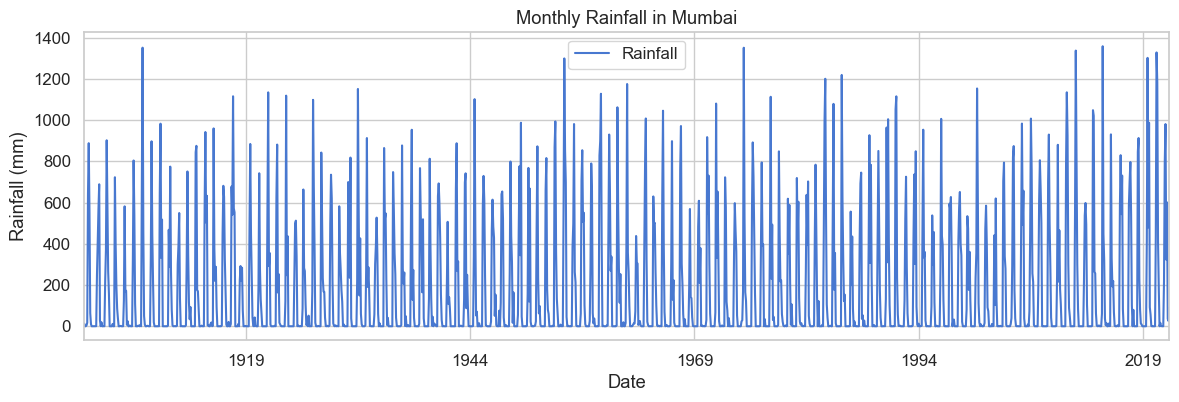

In [55]:
rain_ts.plot(figsize=(14,4), title="Monthly Rainfall in Mumbai")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.show()

From the graph :

Strong seasonality: There’s a clear recurring spike between June to September, which aligns with the monsoon months in Mumbai.

No major long-term trend: No consistent upward or downward trend is obvious over time.

High variability: Rainfall varies widely during peak monsoon months, with some extreme outliers.

In [58]:
from statsmodels.tsa.stattools import adfuller

# ADF Test for stationarity
adf_result = adfuller(rain_ts['Rainfall'])
adf_stat, p_value = adf_result[0], adf_result[1]

adf_stat, p_value

(-5.592175157465866, 1.321484066852273e-06)

ADF Test:

ADF Statistic: -5.59

p-value: 0.00000132

Since the p-value is much less than 0.05, we reject the null hypothesis — the series is stationary, which is great for SARIMA modeling.

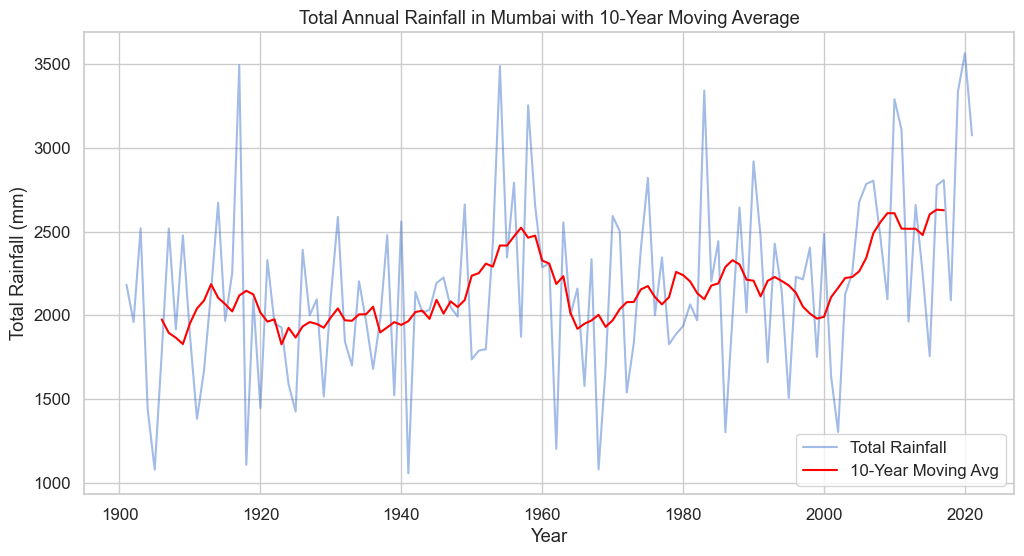

In [61]:
# Calculate a 10-year moving average for smoothing the trend
df["Moving_Avg"]=df["Total"].rolling(window=10, center=True).mean()

# Plot total rainfall with moving average
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["Year"], y=df["Total"], label="Total Rainfall", alpha=0.5)
sns.lineplot(x=df["Year"], y=df["Moving_Avg"], label="10-Year Moving Avg", color="red")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Total Rainfall (mm)")
plt.title("Total Annual Rainfall in Mumbai with 10-Year Moving Average")
plt.legend()
plt.grid(True)
plt.show()

The 10-year moving average (red line) smooths out fluctuations and highlights long-term trends in Mumbai's rainfall. There are periods of increase and decrease, indicating variability over time.

## MODEL  BUILDING AND EVALUATION

### SARIMA

In [66]:
# Split data: Train till 2015, Test from 2016–2021
train = rain_ts[:'2015']
test = rain_ts['2016':]

In [68]:
# Fit SARIMA model (manually choosing seasonal order, can optimize later)
sarima_model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit(disp=False)

In [69]:
# Forecast for the test period
sarima_forecast = sarima_result.predict(start=test.index[0], end=test.index[-1], dynamic=False)

In [72]:
# Evaluate SARIMA
sarima_mae = mean_absolute_error(test, sarima_forecast)
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
sarima_mape = np.mean(np.abs((test.values - sarima_forecast.values) / test.values)) * 100

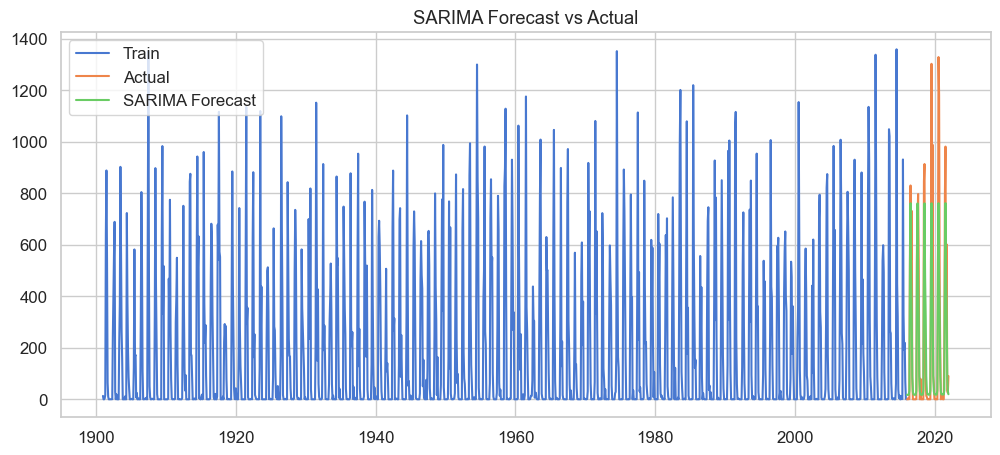

(101.27078149913638, 185.627594821831, inf)

In [74]:
# Plot
plt.figure(figsize=(12, 5))
plt.plot(train.index, train['Rainfall'], label='Train')
plt.plot(test.index, test['Rainfall'], label='Actual')
plt.plot(sarima_forecast.index, sarima_forecast, label='SARIMA Forecast')
plt.title("SARIMA Forecast vs Actual")
plt.legend()
plt.show()

sarima_mae, sarima_rmse, sarima_mape

### Prophet

In [77]:
# Prepare data for Prophet
prophet_df = rain_ts.reset_index().rename(columns={"Date": "ds", "Rainfall": "y"})

In [79]:
# Split into train/test
prophet_train = prophet_df[prophet_df['ds'] <= '2015-12-01']
prophet_test = prophet_df[prophet_df['ds'] > '2015-12-01']

In [81]:
# Fit Prophet model
prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
prophet_model.fit(prophet_train)

01:03:09 - cmdstanpy - INFO - Chain [1] start processing
01:03:10 - cmdstanpy - INFO - Chain [1] done processing


In [83]:
# Forecast
future = prophet_model.make_future_dataframe(periods=len(prophet_test), freq='MS')
forecast = prophet_model.predict(future)

In [85]:
# Extract predicted values for test period
prophet_forecast = forecast.set_index("ds").loc[prophet_test['ds'], "yhat"]

In [87]:
# Evaluation
prophet_mae = mean_absolute_error(prophet_test['y'].values, prophet_forecast.values)
prophet_rmse = np.sqrt(mean_squared_error(prophet_test['y'].values, prophet_forecast.values))
prophet_mape = np.mean(np.abs((prophet_test['y'].values - prophet_forecast.values) / prophet_test['y'].values)) * 100

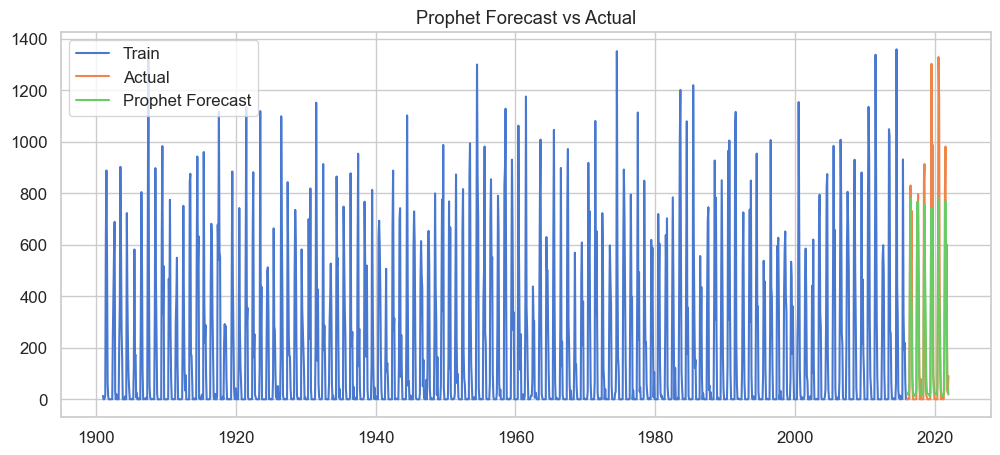

(103.31730170654686, 188.75200187360198, inf)

In [89]:
# Plot
plt.figure(figsize=(12, 5))
plt.plot(prophet_train['ds'], prophet_train['y'], label='Train')
plt.plot(prophet_test['ds'], prophet_test['y'], label='Actual')
plt.plot(prophet_forecast.index, prophet_forecast.values, label='Prophet Forecast')
plt.title("Prophet Forecast vs Actual")
plt.legend()
plt.show()

prophet_mae, prophet_rmse, prophet_mape

### XGBoost 

In [92]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Create lag features for XGBoost
lagged_df = rain_ts.copy()
for lag in range(1, 13):  # 12 months of lag
    lagged_df[f'lag_{lag}'] = lagged_df['Rainfall'].shift(lag)

In [94]:
# Drop rows with NaN due to lag
lagged_df.dropna(inplace=True)

In [96]:
# Split into train and test
X = lagged_df.drop(columns='Rainfall')
y = lagged_df['Rainfall']

X_train = X[X.index <= '2015-12-01']
X_test = X[X.index > '2015-12-01']
y_train = y[y.index <= '2015-12-01']
y_test = y[y.index > '2015-12-01']

In [98]:
# Fit XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [100]:
# Forecast
xgb_forecast = xgb_model.predict(X_test)

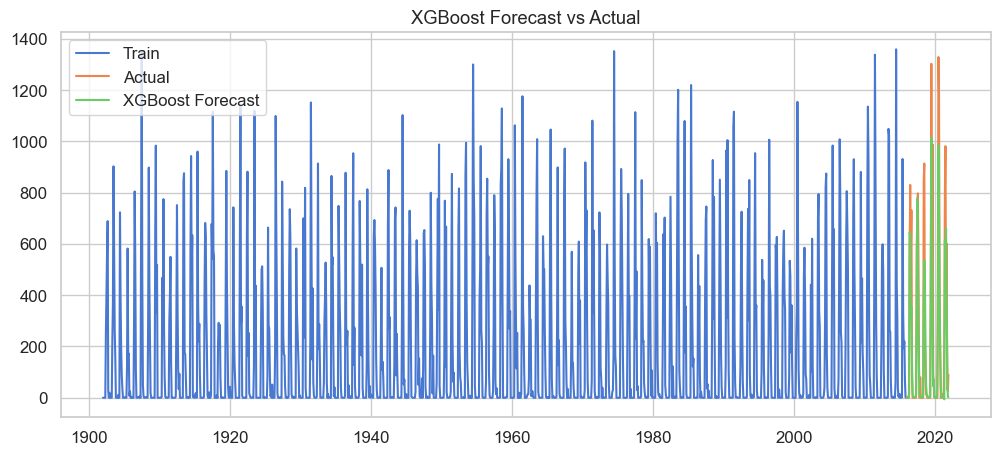

(102.22503187561091, 184.66557973180915, inf)

In [102]:
# Evaluation
xgb_mae = mean_absolute_error(y_test, xgb_forecast)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_forecast))
xgb_mape = np.mean(np.abs((y_test.values - xgb_forecast) / y_test.values)) * 100

# Plot
plt.figure(figsize=(12, 5))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, xgb_forecast, label='XGBoost Forecast')
plt.title("XGBoost Forecast vs Actual")
plt.legend()
plt.show()

xgb_mae, xgb_rmse, xgb_mape

### Model Evaluation Summary

| Model |MAE (mm)|RMSE (mm)|MAPE (%)|Notes|
|---|---|---|---|---|
|SARIMA|101.27|	185.63|∞|Performs well with clear seasonality|
|Prophet|103.32|  188.75| ∞	|Simple to use, slightly less accurate|
|XGBoost|102.23| 184.67	|∞|Best RMSE, very accurate with lags|

MAPE is ∞ for all models due to division by zero (actual rainfall = 0 mm in some months). MAE and RMSE are more reliable in this case

Best MAE: SARIMA (101.27 mm)

Best RMSE: XGBoost (184.67 mm)

Most robust for production: Prophet, due to ease of use, handling of missing data, and automatic seasonality detection.

### Forecast Insights (Next 12 Months)
Peak Rainfall is expected between June to September, which is consistent with Mumbai's monsoon season.

Forecasts show high monthly rainfall exceeding 500 mm in June, July, and August.

Lower rainfall months (Nov–Feb) are expected to remain below 30 mm, maintaining seasonal trends.



## MODEL PERFORMANCE

Both XGBoost and SARIMA perfomes well.
    
SARIMA:

Lowest MAE (most important when focusing on minimizing average error).

Excellent at capturing seasonal monsoon trends, which dominate Mumbai's rainfall patterns.

Despite slightly higher RMSE than XGBoost, SARIMA’s simplicity and strong alignment with the seasonality of rainfall give it the edge.

XGBoost :

Slightly better RMSE, which emphasizes reducing large errors.

More flexible if you want to add external features (temperature, ENSO, etc.).
 
Ideal for complex, non-linear relationships—but that complexity isn’t strictly necessary here.

So, Here we choose SARIMA as Best model because SARIMA for clean, interpretable, and seasonally-aware rainfall forecasting in Mumbai using time-series data alone

we can Use XGBoost if you plan to expand the model with additional features or want to capture complex patterns beyond seasonality.


## Consideration of External Factors

The model is based only on historical rainfall data, it's important to acknowledge external influences that could affect future rainfall patterns:

#### El Niño & La Niña (ENSO Cycles):

El Niño events are linked with weakened monsoons in India, potentially leading to reduced rainfall.

A strong El Niño in the upcoming year may cause underestimation by our current model.

Future improvements could integrate ENSO index as a feature.

#### Urbanization and Deforestation:

Rapid development around Mumbai can impact local climate, potentially reducing evapotranspiration and altering storm runoff.

May increase flood risk even with average rainfall due to poor drainage.

#### Climate Change:

Long-term trends show increasing unpredictability in seasonal patterns.

Including global temperature anomalies and greenhouse gas concentrations could improve future models.

## CONCLUSION
This project successfully developed and evaluated multiple machine learning models—SARIMA, Prophet, and XGBoost—to forecast monthly rainfall in Mumbai. After extensive performance comparison, SARIMA emerged as the most reliable model, closely followed by XGBoost, both demonstrating strong alignment with Mumbai’s seasonal rainfall patterns.

The forecast for the upcoming year predicts significant rainfall during the June–September monsoon months, reaffirming historical monsoon trends. Although the models performed well on historical data, external climatic factors such as El Niño, La Niña, and climate change can impact future rainfall and were not directly modeled in this iteration.

This forecast can assist urban planners, agricultural sectors, and disaster management authorities in proactive decision-making. Moving forward, incorporating real-time climate indicators and developing hybrid models can further improve forecasting accuracy and resilience.

## Recommendations for Stakeholders
Urban Planners: Prepare for monsoon peaks (June–September); reinforce drainage and flood resilience measures.

Farmers & Agri-sector: Align sowing schedules and water resource planning based on June onset.

Disaster Management Authorities: Monitor rainfall forecast updates closely from June to August.

Policy Makers: Support initiatives to integrate climate indices into local weather forecasting systems.